# Prosper Loans Dataset
## by Amr Gamal Anwar

## Investigation Overview

This investigation aims to visualize the features that affects the loan amount and thus to consider these features in our decision making process.


## Dataset Overview

The data set contains 113,937 values and 81 features, such as borrower interest rate, lLoan amount, and income. I have chosen 15 feature which I though would be of the most significance.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the most popular loan term?

Each loan has a fixed term lenght, 12 months, 36 months, or 60 months. When investigating their counts, I found that the medium length term of 36 months is significantly more frequent than the other two terms.

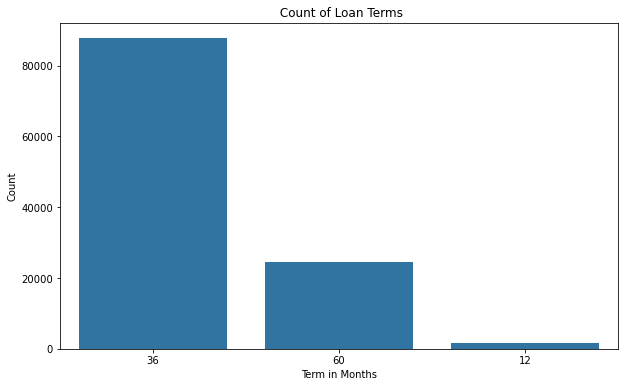

In [40]:
base_color = sb.color_palette()[0]
freq_term = df['Term'].value_counts().index
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='Term', color=base_color, order=freq_term)
plt.title(' Count of Loan Terms')
plt.ylabel('Count')
plt.xlabel('Term in Months')
plt.savefig('Term bar charts.png');

## Distribution of Estimated Return from Loans

Estimated return is the return we expect from giving out a loan. By looking at the distribution of this estimate, we find that the most points occur arround 0.07 and 0.08, with the distribution being a normal distribution.

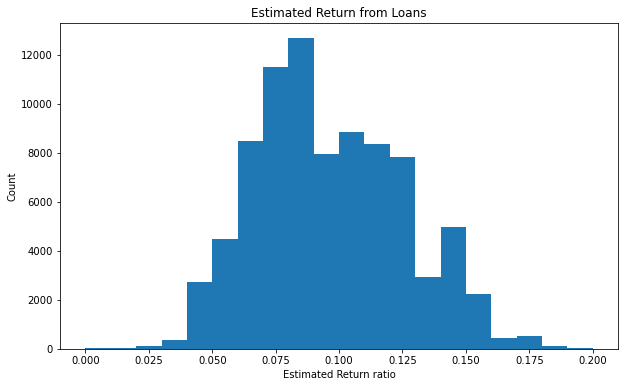

In [11]:
bins = np.arange(0, 0.21, 0.01)
plt.figure(figsize=[10,6])
plt.hist(df['EstimatedReturn'], bins=bins)
plt.xlabel('Estimated Return ratio')
plt.ylabel('Count')
plt.title('Estimated Return from Loans')
plt.savefig('Histogram.png');

## How many borrowers do we have in each income range? and do they own a home?

When we look at a bivariate relation between the income range of borrowers and the fact they own a home or not, we observe that higher income ranges usually also own a home, while the opposite is true for lower income ranges. 

Another observation is that the highest count of borrowers we have is borrowers from medium income ranges 25,000 to 49,999 dollars that do not own a home.

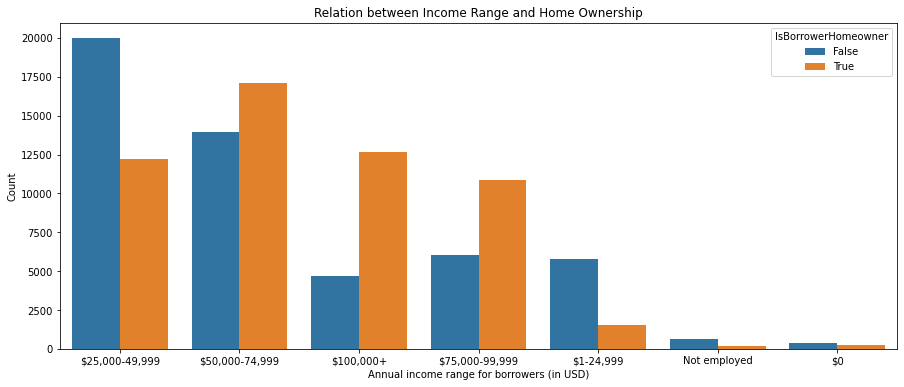

In [39]:
plt.figure(figsize=[15,6])
sb.countplot(data=df, x='IncomeRange', hue='IsBorrowerHomeowner')
plt.title('Relation between Income Range and Home Ownership')
plt.ylabel('Count')
plt.xlabel('Annual income range for borrowers (in USD)')
plt.savefig('bi.png')

## How the income range of a borrower and the loan term affects the loan amount given?

When looking at the relation between income range and term lenght, and between the loan amount given, we find that it is always a higher loan amount for borrowers in a higher income range and a longer term length. It is also evident that in all income ranges, longer loan term always have a higher loan amount than shorter terms accordingly.

In [44]:
df2 = df[df.IncomeRange != 'Not displayed']

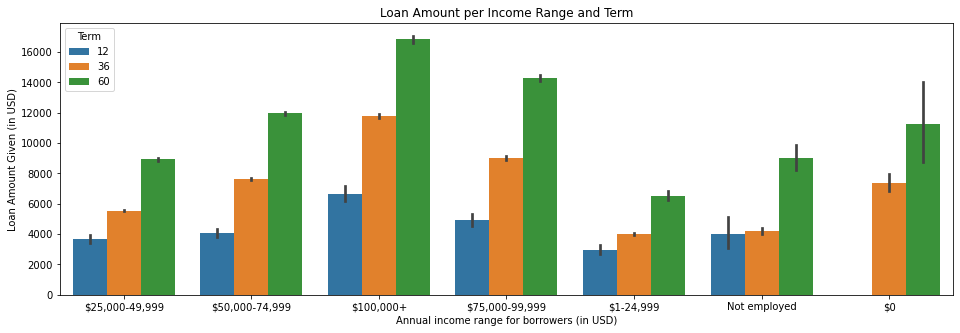

In [46]:
plt.figure(figsize=(16,5))
sb.barplot(data = df2, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term')
plt.title('Loan Amount per Income Range and Term')
plt.xlabel('Annual income range for borrowers (in USD)')
plt.ylabel('Loan Amount Given (in USD)')
plt.savefig('multivariate.png');

In [9]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 646254 bytes to slide_deck_template.slides.html
